# 고급회귀분석 과제
> 

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Advanced Regression Analysis]

---

과제1

**풀이** :

R 이용하지 않고 직접 계산. (R로 단순 계산은 해도 됨)

모든 문제에는 풀이가 있어야 함.

풀이 없이 답만 있는 경우 '0'점 처리.

 

- 제출 기한 : 10월 03일

**제출 방법** : 

직접 제출 (607호) 또는 스캔, 사진, tex 작업, 문서 작업 등 후 pdf로 변환 후 제출

pdf 아닌 경우 미제출 처리

---

1. 원점을 지나는 회귀모형은 다음과 같이 정의할 수 있다.
$$y_i =β_1x_i +ε_i, ε_i ∼_{i.i.d.} N(0,σ^2), i=1,...,n$$
오차제곱합을 정의하고 $β_1$ 의 최소제곱추정량 ($\hat{β}_1$)을 구하여라.

$SST = SSR + SSE$

$SSE = SST - SSR$

$\sum(\bar{y_i} - \hat{y_i}) = \sum(y_i - \hat{y}_i)^2 - \sum(y_i - \bar{y_i})^2$



2. 자동차의 무게가 무거우면 이를 움직이는 데 더 많은 연료가 소모된다는 것은 알려진 사실이다. 자동차의 무게와 자동차를 1km 움직이는 데 필요한 에너지량과의 함수관계를 정확히 판단하기 위하여 A 자동차회사는 다음의 자료를 실험을 통하여 얻었다. 실험 비용이 많이 드는 관계로 9번만 실험하였다.

|무게 X(단위: 1,000kg)|에너지소모량 Y(단위: 1,000btu)|
|:---:|:---:|
|0.9|2.0|
|1.3|2.6|
|2.1|4.3|
|2.5|5.8|
|2.4|5.1|
|1.7|3.2|
|0.7|1.8|
|1.2|2.3|
|1.6|3.0|

(1) 이 데이터의 산점도를 그리시오.

In [30]:
dt <- data.frame(x = c(0.9,1.3,2.1,2.5,2.4,1.7,0.7,1.2,1.6),
                 y = c(2.0,2.6,4.3,5.8,5.1,3.2,1.8,2.3,3.0))
dt

x,y
<dbl>,<dbl>
0.9,2.0
1.3,2.6
2.1,4.3
2.5,5.8
2.4,5.1
1.7,3.2
0.7,1.8
1.2,2.3
1.6,3.0


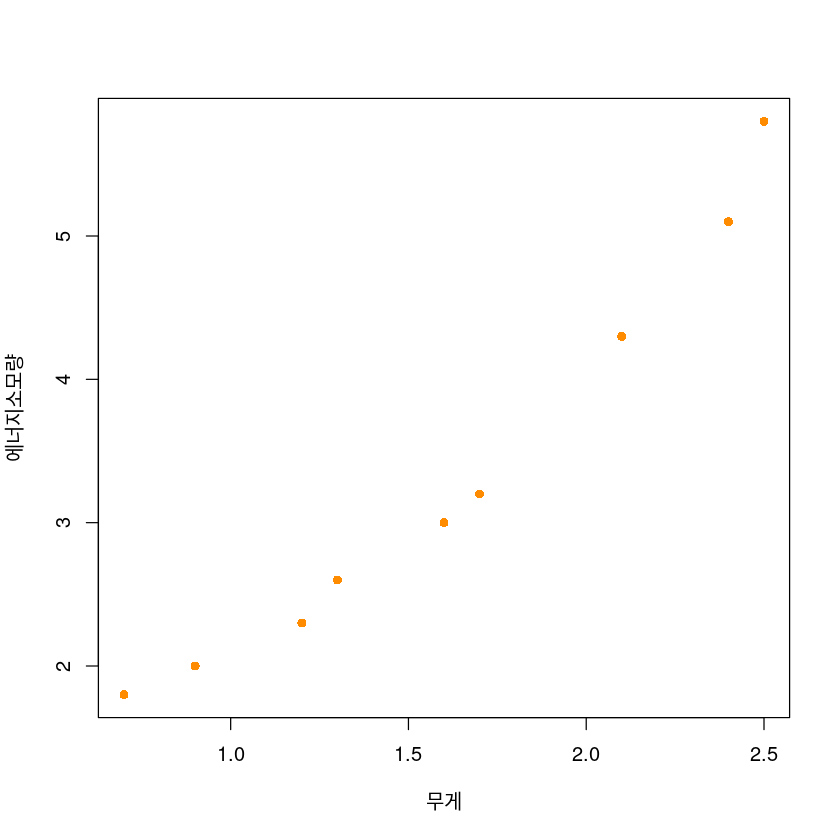

In [31]:
plot(y~x, 
     data = dt,
     xlab = "무게",
     ylab = "에너지소모량",
     pch  = 16,
     cex  = 1,
     col  = "darkorange")

(2) 최소제곱법의 의한 회귀직선을 적합시키시오.

In [32]:
dt1 <- data.frame(
  i = 1:nrow(dt),
  x = dt$x,
  y = dt$y,
  x_barx = dt$x - mean(dt$x),
  y_bary = dt$y - mean(dt$y)) 

In [33]:
dt1$x_barx2 <- dt1$x_barx^2
dt1$y_bary2 <- dt1$y_bary^2
dt1$xy <-dt1$x_barx * dt1$y_bary

In [34]:
dt1

i,x,y,x_barx,y_bary,x_barx2,y_bary2,xy
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.9,2.0,-0.7,-1.3444444,0.49,1.8075309,0.94111111
2,1.3,2.6,-0.3,-0.7444444,0.09,0.5541975,0.22333333
3,2.1,4.3,0.5,0.9555556,0.25,0.9130864,0.47777778
4,2.5,5.8,0.9,2.4555556,0.81,6.0297531,2.21000000
5,2.4,5.1,0.8,1.7555556,0.64,3.0819753,1.40444444
6,1.7,3.2,0.1,-0.1444444,0.01,0.0208642,-0.01444444
7,0.7,1.8,-0.9,-1.5444444,0.81,2.3853086,1.39000000
8,1.2,2.3,-0.4,-1.0444444,0.16,1.0908642,0.41777778
9,1.6,3.0,0.0,-0.3444444,0.00,0.1186420,0.00000000


In [35]:
round(colSums(dt1),3)

i       x       y  x_barx  y_bary x_barx2 y_bary2      xy 
 45.000  14.400  30.100   0.000   0.000   3.260  16.002   7.050

$\hat{\beta_1} = \frac{S_{xy}}{S_{xx}}$

$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$

In [36]:
beta1 <- as.numeric(colSums(dt1)[8]/colSums(dt1)[6])
beta0 <- mean(dt$y) - beta1 *  mean(dt$x)

In [37]:
cat("hat beta0 = ", beta0)
cat("hat beta1 = ", beta1)

hat beta0 =  -0.1156783hat beta1 =  2.162577

- $\hat{y} =  -0.1156783 +  2.162577x$의 모형으로 적합되었다.

(3) 데이터의 산점도를 그리고 추정한 회귀직선을 (1)에서 그린 산점도 위에 그리시오.

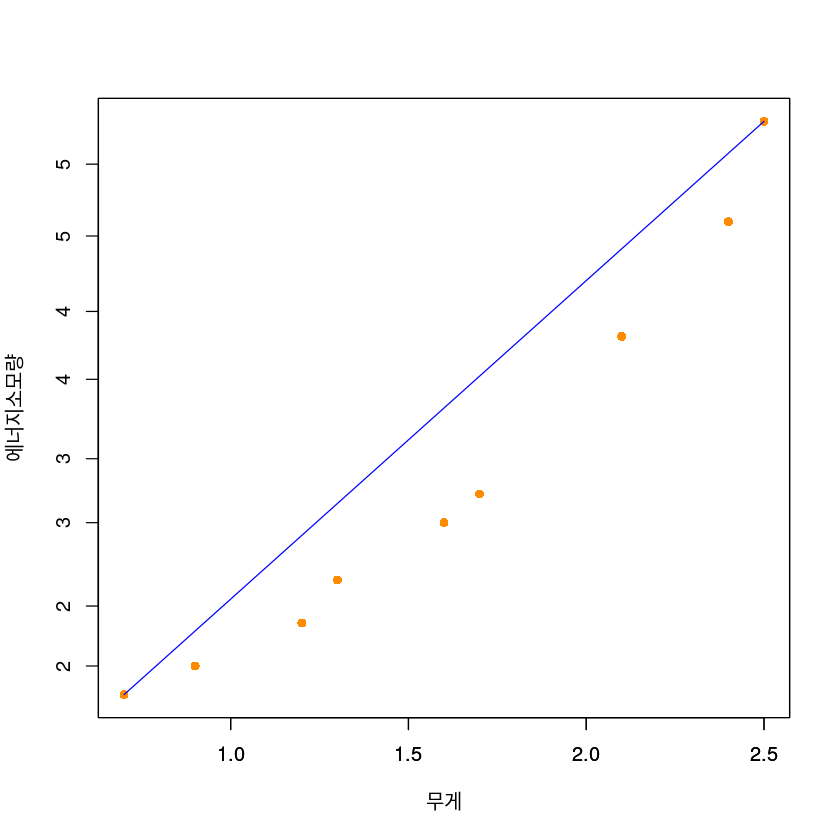

In [54]:
plot(y~x, 
     data = dt,
     xlab = "무게",
     ylab = "에너지소모량",
     pch  = 16,
     cex  = 1,
     col  = "darkorange")
par(new=TRUE)
plot(x,-0.1156783 +  2.162577*dt$x,
     xlab = "",
     ylab = "",
     pch  = 16,
     cex  = 1,type='l',
     col  = "blue")

(4) 결정계수와 상관계수를 구하시오.

In [55]:
cor(x,y)

[1] 0.9760907

- 상관계수는 $0.976090685311348$ 로, $x,y$간 양의 상관관계가 높았다.

$R^2 = \frac{SSR}{SST} = r^2$

In [61]:
SST = sum((y - mean(y))^2)

In [64]:
SSR = sum(((-0.1156783 +  2.162577*dt$x)-mean(y))^2)

In [65]:
SSE = SST - SSR

In [71]:
cat("SST = ", SST)
cat("\nSSR = ", SSR)
cat("\nSSE = ", SSE)

SST =  16.00222
SSR =  15.24617
SSE =  0.7560522

In [66]:
SSR/SST

[1] 0.9527533

- 결정계수는 약 95%로, 설명력도 높은 편이라고 말할 수 있다.

(5) 분산분석표를 작성하고 회귀직선의 유의 여부를 검정하시오 (유의수준 $α = 0.05$ 사용).

In [74]:
cat("MSR = ", SSR/1)
cat("\nMSE = ", SSE/7)

SSR =  15.24617
SSE =  0.1080075

In [76]:
cat("F value = ",15.24617/0.1080075)

F value =  141.1584

In [77]:
cat("p value = ",df(141.15843807143,1,7))

p value =  1.614672e-07

||df|sum of square|mean of square| F value| p value|
|:---:|:---:|:---:|:---:|:---:|:---:|
|x|1|15.24617|15.24617|141.1584|1.614672e-07|
|Residuals|7|0.7560522|0.1080075|||

- F값은 141.1584, p value는 1.614672e-07가 나왔다.
- 유의수준 5%에서 모형이 유의하다.

OR

In [120]:
model1 = lm(y~x,dt)

In [121]:
anova(model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,15.2461656,15.2461656,141.1576,6.798033e-06
Residuals,7,0.7560566,0.1080081,NA,NA


(6) $β_0,β_1$ 에 대한 90% 신뢰구간을 구하시오.

In [58]:
qt(0.025, 7)
qt(0.975, 7)

[1] -2.364624

[1] 2.364624

$$\beta_1 + t_{\alpha/2,n-2} \sqrt{\frac{MSE}{S_{xx}}}$$

In [100]:
cat("Beta0 confidence level",beta0 + qt(0.025, 7) * sqrt((SSE/7)*(1/9 + mean(x)^2/sum((x - mean(x))^2))),"-",beta0 + qt(0.975, 7) * sqrt((SSE/7)*(1/9 + mean(x)^2/sum((x - mean(x))^2))))

Beta0 confidence level -0.8514394 - 0.6200828

In [102]:
cat("Beta1 confidence level",beta1 + qt(0.025, 7) * sqrt((SSE/7)/sum((x - mean(x))^2)),'-',beta1 + qt(0.975, 7) * sqrt((SSE/7)/sum((x - mean(x))^2)))

Beta1 confidence level 1.732169 - 2.592985

- $\beta_0$의 신뢰구간은 0을 포함하며 유의하지 않음을 알 수 있다,
- $\beta_1$의 신뢰구간은 0을 포함하지 않으며, 유의함을 알 수 있다.

OR

In [122]:
confint(model1, level = 0.95)

,2.5 %,97.5 %
(Intercept),-0.8514415,0.620085
x,1.7321676,2.592986


(7) $H_0 :β_1 =1$ vs. $H_1 :β_1  \ne 1$의 가설검정을 유의수준 $α=0.1$에서 수행하시오.

$\text{t value} = \frac{\hat{\beta_1} - 1}{s.e(\hat{\beta_1})}$

In [110]:
(beta1 - 1)/sqrt((SSE/7)/sum((x - mean(x))^2))

[1] 6.387098

In [109]:
qt(0.95,1)

[1] 6.313752

- t value가 $6.31375151467504$ 보다 크기 때문에 유의하지 않다는 결과가 나와 대립가설을 채택한다.
- 따라서 $\beta_1$은 1이 아니다.

OR

In [ ]:
ttest()

(8) 무게가 3,000kg 이 되는 차량의 평균 에너지 소모량을 예측하시오. 이것은 무게가 1,000kg이 되는 차량의 에너지 소모량의 몇 배인가?

In [115]:
cat("평균 에너지 소모량 = ",mean(beta0 + beta1 * 3))

평균 에너지 소모량 =  6.372052

In [119]:
cat(mean(beta0 + beta1 * 3)/mean(beta0 + beta1 * 1),"배")

3.113028 배

OR

In [131]:
predict(model1, 
        data.frame(x = 3),
        interval = c("confidence"), level = 0.95)

,fit,lwr,upr
1,6.372052,5.716158,7.027945


In [132]:
predict(model1, 
        data.frame(x = 1),
        interval = c("confidence"), level = 0.95)

,fit,lwr,upr
1,2.046898,1.681121,2.412676


In [134]:
cat(6.372052/2.046898 ,"배")

3.113029 배

(9) 무게가 3,000kg 이 되는 차량의 평균 에너지 소모량과 하나의 개별 $y$ 값의 90% 신뢰구간을 각각 구하시오.

In [135]:
predict(model1, 
        data.frame(x = 3),
        interval = c("confidence"), level = 0.95)

,fit,lwr,upr
1,6.372052,5.716158,7.027945


개별 에너지 소모량

In [140]:
predict(model1, 
        data.frame(x = 3),
        interval = c("prediction"), level = 0.95)

,fit,lwr,upr
1,6.372052,5.355136,7.388968


(10) 잔차 $e_i = y_i − \hat{y}_i$ 를 구하고 잔차의 합이 0 임을 확인하시오.

In [142]:
epsilon = y - model1$fitted.values

In [144]:
cat("잔차의 합 = ",sum(epsilon))

잔차의 합 =  6.661338e-16

(11) 잔차들의 $x_i$ 에 대한 가중합, $\sum x_ie_i$ 를 구하시오.

In [146]:
sum(x * epsilon)

[1] 1.81799e-15

(12) 잔차들의 $\hat{y}$에 대한 가중합 $\sum \hat{y}_ie_i$, 를 구하시오.

In [147]:
sum(model1$fitted.values*epsilon)

[1] 3.552714e-15

(13) 원점을 지나는 회귀직선을 구하시오.

In [148]:
model2 = lm(y ~ x + 0, dt)

In [153]:
summary(model2)


Call:
lm(formula = y ~ x + 0, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3687 -0.2191 -0.1084  0.1107  0.5519 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x  2.09924    0.06053   34.68 5.23e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3104 on 8 degrees of freedom
Multiple R-squared:  0.9934,	Adjusted R-squared:  0.9926 
F-statistic:  1203 on 1 and 8 DF,  p-value: 5.228e-10


$y = 2.09924x$

(14) 위 회귀직선에서 회귀계수(기울기)의 90% 신뢰구간을 구하시오.

In [151]:
confint(model2, level = 0.95)

,2.5 %,97.5 %
x,1.959648,2.238831


(15) 원점을 지나는 회귀직선의 결정계수를 구하시오.

In [154]:
summary(model2)


Call:
lm(formula = y ~ x + 0, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3687 -0.2191 -0.1084  0.1107  0.5519 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x  2.09924    0.06053   34.68 5.23e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3104 on 8 degrees of freedom
Multiple R-squared:  0.9934,	Adjusted R-squared:  0.9926 
F-statistic:  1203 on 1 and 8 DF,  p-value: 5.228e-10


- Multiple R-squared는  0.9934고, Adjusted R-squared는  0.9926이다.

(16) 원점을 포함한 회귀직선과 포함하지 않은 회귀직선의 결과를 비교하여라.

In [155]:
summary(model1)


Call:
lm(formula = y ~ x, data = dt)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36070 -0.17941 -0.09567  0.16936  0.50924 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.1157     0.3112  -0.372    0.721    
x             2.1626     0.1820  11.881  6.8e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3286 on 7 degrees of freedom
Multiple R-squared:  0.9528,	Adjusted R-squared:  0.946 
F-statistic: 141.2 on 1 and 7 DF,  p-value: 6.798e-06


In [156]:
summary(model2)


Call:
lm(formula = y ~ x + 0, data = dt)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3687 -0.2191 -0.1084  0.1107  0.5519 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x  2.09924    0.06053   34.68 5.23e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3104 on 8 degrees of freedom
Multiple R-squared:  0.9934,	Adjusted R-squared:  0.9926 
F-statistic:  1203 on 1 and 8 DF,  p-value: 5.228e-10


||원점 포함하지 않은 모델|원점 포함한 모델|
|:--:|:--:|:--:|
|Residual Standard Error|0.3286|0.3104|
|$R^2$|0.9528|0.9934|
|Adjusted $R^2$|0.946|0.9926|
|F value|141.2|1203|
|p value of model|6.798e-06|5.228e-10|
|p va;ue of $\beta_0$|0.721|NA|
|p value of $\beta_1$| 6.8e-06|5.23e-10|

- 원점을 포함한 모델은 원점을 포함하지 않은 모델보다 Residual Standard Error값이 작고,
- 결정계수가 높아 설명력이 더 좋으며,
- F값도 크다.

공통
- 두 모델 모두 식이 유의하나, 
    - 원점을 포함하지 않은 모델의 $\beta_0$는 유의하지 않다는 결과가 나왔다.

3. (강의노트 CH04, p9) 다음이 성립함을 증명하시오.

$$\hat{beta}_0 ~ N\big( \beta_0 , \sigma^2\big( \frac{1}{n} + \frac{\bar{x}^2}{S_{(xx)}} \big) \big)$$